## Banking Domain

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

## Load the Dataset

In [3]:
clients = pd.read_csv("Clients.csv")
banking = pd.read_csv("banking-realtionships.csv")
gender = pd.read_csv("gender.csv")
advisors = pd.read_csv("investment-advisiors.csv")


## Understanding the Datasets

In [ ]:
clients.shape


(3000, 25)

In [6]:
clients.columns

Index(['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'BRId', 'GenderId', 'IAId'],
      dtype='object')

In [ ]:
# Check the shape of the banking DataFrame
banking.shape

(4, 2)

In [10]:
# Show the columns of the banking DataFrame
banking.columns

Index(['BRId', 'Banking Relationship'], dtype='object')

In [11]:
# Check the shape of the Gender DataFrame
gender.shape

(2, 2)

In [12]:
# Show the columns of the gender DataFrame
gender.columns

Index(['GenderId', 'Gender'], dtype='object')

In [ ]:
# Check the shape of the advisors DataFrame
advisors.shape


(22, 2)

In [14]:
# Show the columns of the banking DataFrame
advisors.columns

Index(['IAId', 'Investment Advisor'], dtype='object')

In [20]:
clients.head()


,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


## Join the DataFrames to create a single DataFrame for the Banking Domain

In [23]:
clients = clients.merge(banking, on="BRId", how="left")\
                 .merge(gender, on= "GenderId", how="left")\
                 .merge(advisors, on="IAId", how="left")

In [24]:
clients.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId,Banking Relationship_x,Banking Relationship_y,Gender,Investment Advisor
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1134475.30,1,2,1,1,1,Retail,Retail,Male,Victor Dean
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,2000526.10,1,3,2,1,2,Institutional,Institutional,Male,Jeremy Porter
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,548137.58,1,3,3,2,3,Private Bank,Private Bank,Female,Ernest Knight
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1148402.29,0,4,4,1,4,Commercial,Commercial,Male,Eric Shaw
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,1674412.12,0,3,1,2,5,Retail,Retail,Female,Kevin Kim


In [25]:
clients.drop(columns=["BRId", "GenderId", "IAId"], inplace=True)

In [28]:
clients.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Banking Relationship_x,Banking Relationship_y,Gender,Investment Advisor
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,603617.88,607332.46,12249.96,1134475.30,1,2,Retail,Retail,Male,Victor Dean
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,229521.37,344635.16,61162.31,2000526.10,1,3,Institutional,Institutional,Male,Jeremy Porter
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,652674.69,203054.35,79071.78,548137.58,1,3,Private Bank,Private Bank,Female,Ernest Knight
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,234685.02,57513.65,1148402.29,0,4,Commercial,Commercial,Male,Eric Shaw
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,446644.25,128351.45,30012.14,1674412.12,0,3,Retail,Retail,Female,Kevin Kim


In [27]:
clients.shape

(3000, 26)

In [30]:
# Check the Data types of the columns in the clients DataFrame
clients.dtypes

Client ID                    object
Name                         object
Age                           int64
Location ID                   int64
Joined Bank                  object
Banking Contact              object
Nationality                  object
Occupation                   object
Fee Structure                object
Loyalty Classification       object
Estimated Income            float64
Superannuation Savings      float64
Amount of Credit Cards        int64
Credit Card Balance         float64
Bank Loans                  float64
Bank Deposits               float64
Checking Accounts           float64
Saving Accounts             float64
Foreign Currency Account    float64
Business Lending            float64
Properties Owned              int64
Risk Weighting                int64
Banking Relationship_x       object
Banking Relationship_y       object
Gender                       object
Investment Advisor           object
dtype: object

In [31]:
# Check the Null values in the clients DataFrame
clients.isnull().sum()

Client ID                   0
Name                        0
Age                         0
Location ID                 0
Joined Bank                 0
Banking Contact             0
Nationality                 0
Occupation                  0
Fee Structure               0
Loyalty Classification      0
Estimated Income            0
Superannuation Savings      0
Amount of Credit Cards      0
Credit Card Balance         0
Bank Loans                  0
Bank Deposits               0
Checking Accounts           0
Saving Accounts             0
Foreign Currency Account    0
Business Lending            0
Properties Owned            0
Risk Weighting              0
Banking Relationship_x      0
Banking Relationship_y      0
Gender                      0
Investment Advisor          0
dtype: int64

`### We can see that there are no missing values in my DataSets.`

In [33]:
# Check the Duplicates in the clients DataFrame
clients.duplicated().sum()

0

`### There are no duplicate rows in my DataFrames.`

## Convert Data Types

In [37]:
clients['Joined Bank'] = pd.to_datetime(clients['Joined Bank'], format='%d-%m-%Y', errors='coerce')

In [38]:
clients.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Banking Relationship_x,Banking Relationship_y,Gender,Investment Advisor
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,603617.88,607332.46,12249.96,1134475.30,1,2,Retail,Retail,Male,Victor Dean
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,229521.37,344635.16,61162.31,2000526.10,1,3,Institutional,Institutional,Male,Jeremy Porter
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,652674.69,203054.35,79071.78,548137.58,1,3,Private Bank,Private Bank,Female,Ernest Knight
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,234685.02,57513.65,1148402.29,0,4,Commercial,Commercial,Male,Eric Shaw
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,446644.25,128351.45,30012.14,1674412.12,0,3,Retail,Retail,Female,Kevin Kim


### View the summary statistics of the numerical columns in the clients DataFrame

In [44]:
numerical_cols = [
    'Age', 'Estimated Income', 'Superannuation Savings', 'Amount of Credit Cards',
    'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts',
    'Saving Accounts', 'Foreign Currency Account', 'Business Lending', 'Properties Owned',
    'Risk Weighting'
]


# Category  columns
categorical_cols = [
    'Nationality', 'Occupation', 'Fee Structure', 'Loyalty Classification',
    'Gender', 'Investment Advisor', 'Banking Relationship_x', 'Banking Relationship_y'
]


In [43]:
clients[numerical_cols].describe()

,Age,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000
mean,51.039667,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333
std,19.854760,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191
min,17.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000
25%,34.000000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000
50%,51.000000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000
75%,69.000000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000
max,85.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000


## Univariate Analysis

#### Categorical Columns

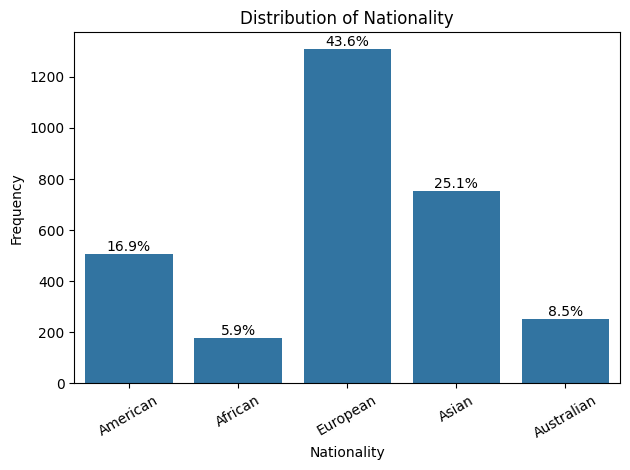

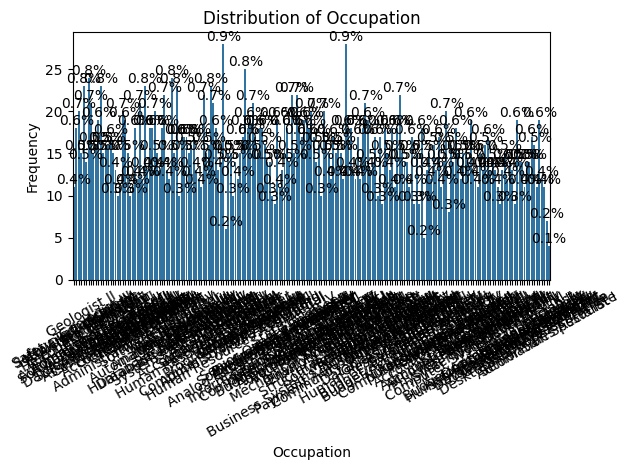

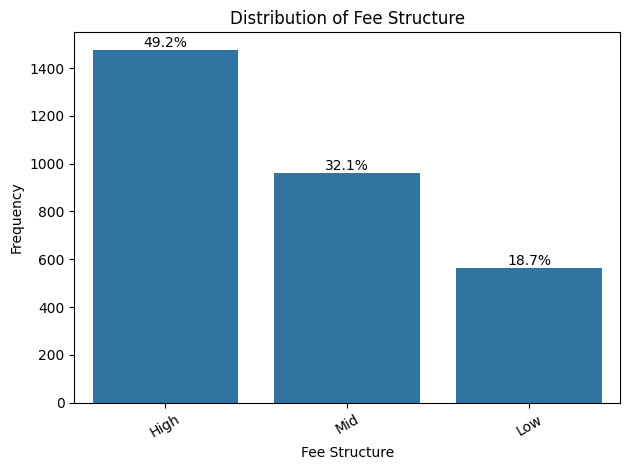

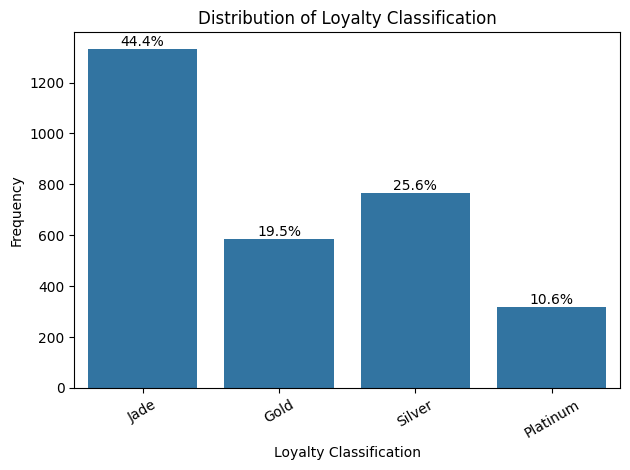

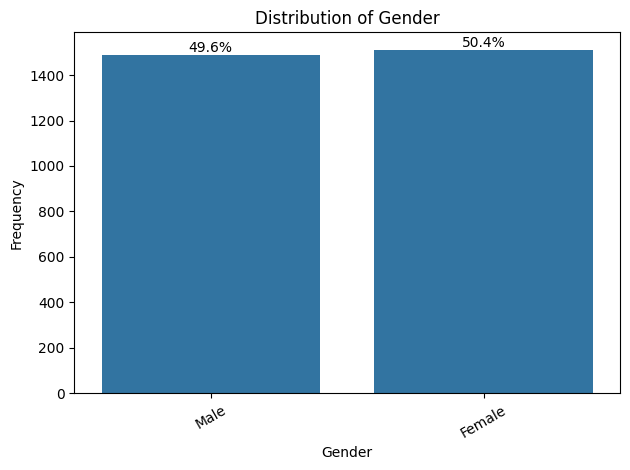

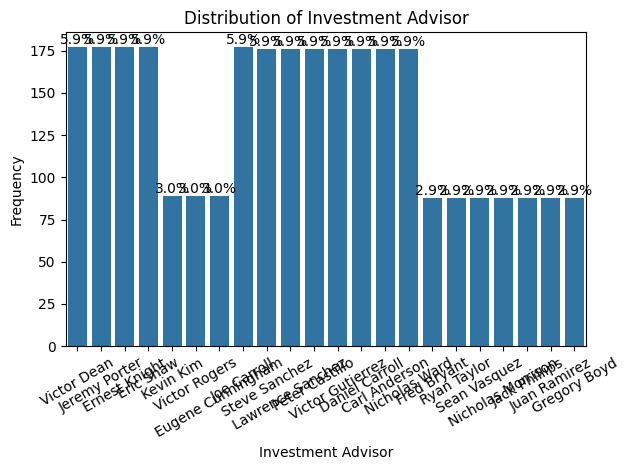

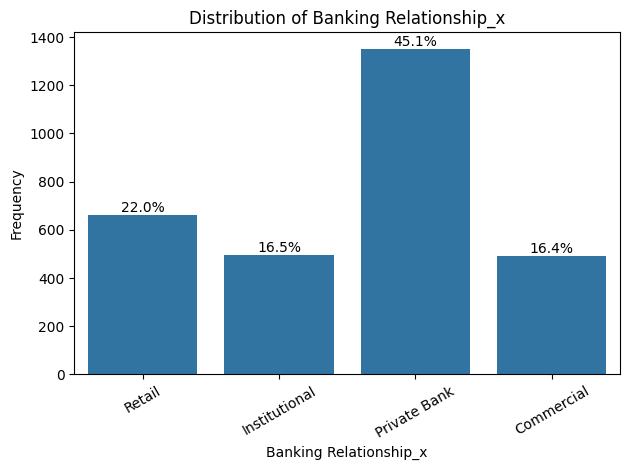

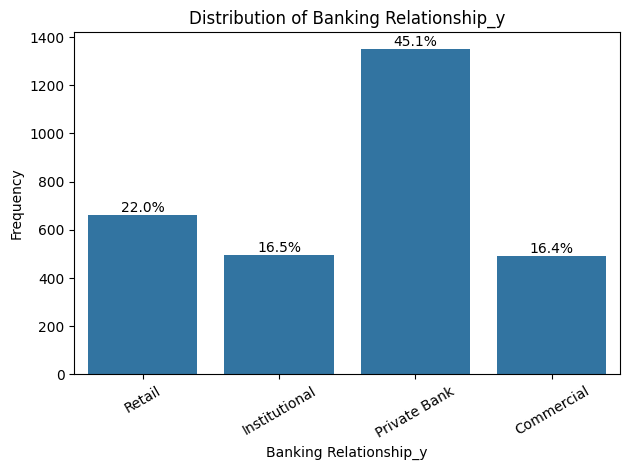

In [54]:
# Total records (for percentage calculation)
total = len(clients)

# Plot for each categorical column
for idx, col in enumerate(clients[categorical_cols].columns):
    plt.figure(idx)
    ax = sns.countplot(x=col, data=clients)
    
    # Set titles and labels
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Annotate bars with percentage
    for p in ax.patches:
        count = p.get_height()
        percentage = 100 * count / total
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., count), 
                    ha='center', va='bottom', fontsize=10)

    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()



In [47]:
clients.columns

Index(['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'Banking Relationship_x', 'Banking Relationship_y',
       'Gender', 'Investment Advisor'],
      dtype='object')

## Univariate Analysis on Numerical Columns


📊 Feature: Age
--------------------------------------------------
count    3000.000000
mean       51.039667
std        19.854760
min        17.000000
25%        34.000000
50%        51.000000
75%        69.000000
max        85.000000
Name: Age, dtype: float64


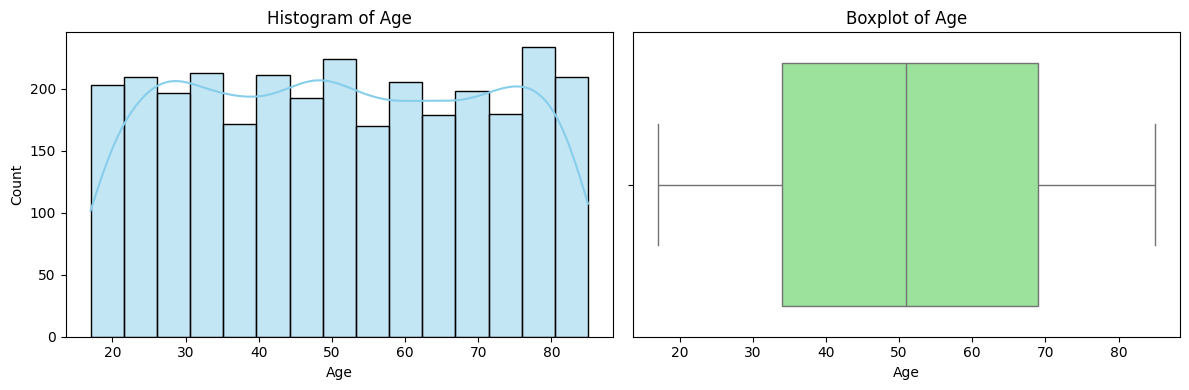


📊 Feature: Location ID
--------------------------------------------------
count     3000.000000
mean     21563.323000
std      12462.273017
min         12.000000
25%      10803.500000
50%      21129.500000
75%      32054.500000
max      43369.000000
Name: Location ID, dtype: float64


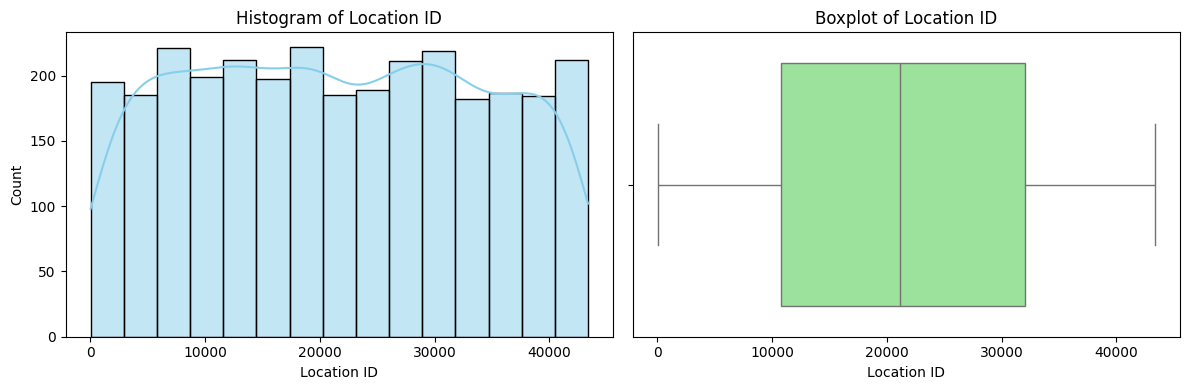


📊 Feature: Estimated Income
--------------------------------------------------
count      3000.000000
mean     171305.034263
std      111935.808209
min       15919.480000
25%       82906.595000
50%      142313.480000
75%      242290.305000
max      522330.260000
Name: Estimated Income, dtype: float64


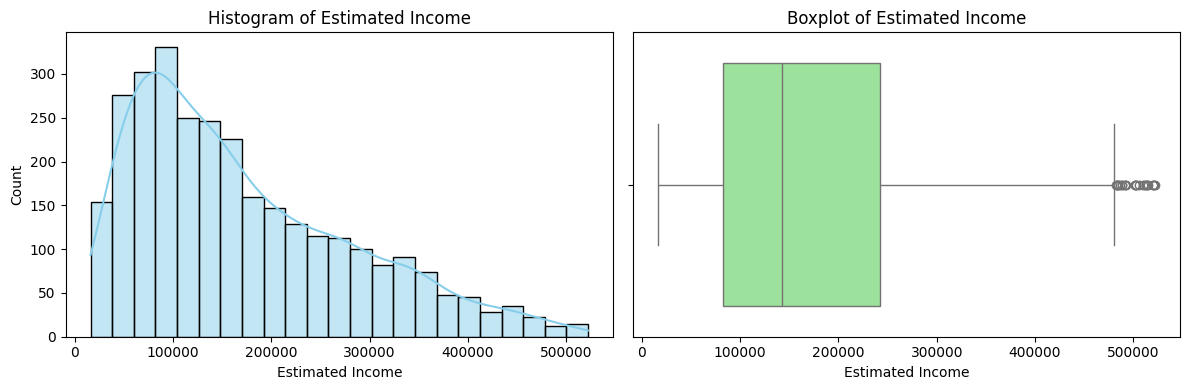


📊 Feature: Superannuation Savings
--------------------------------------------------
count     3000.000000
mean     25531.599673
std      16259.950770
min       1482.030000
25%      12513.775000
50%      22357.355000
75%      35464.740000
max      75963.900000
Name: Superannuation Savings, dtype: float64


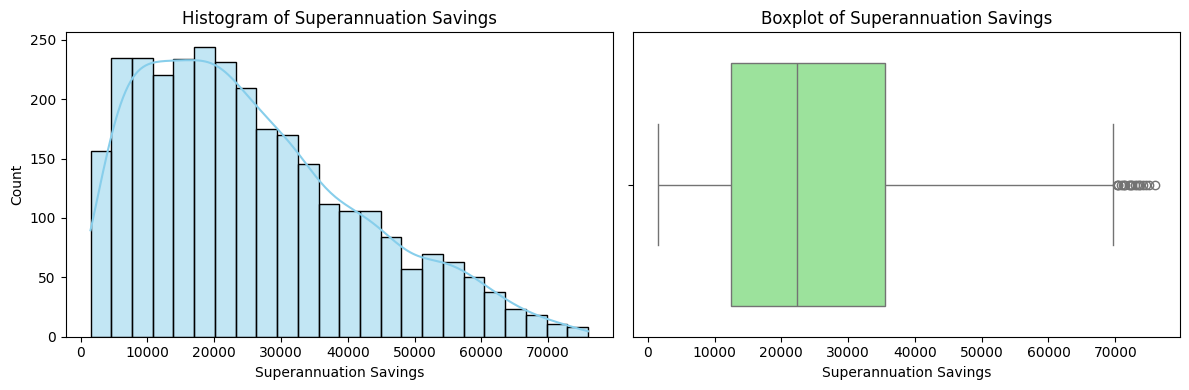


📊 Feature: Amount of Credit Cards
--------------------------------------------------
count    3000.000000
mean        1.463667
std         0.676387
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: Amount of Credit Cards, dtype: float64


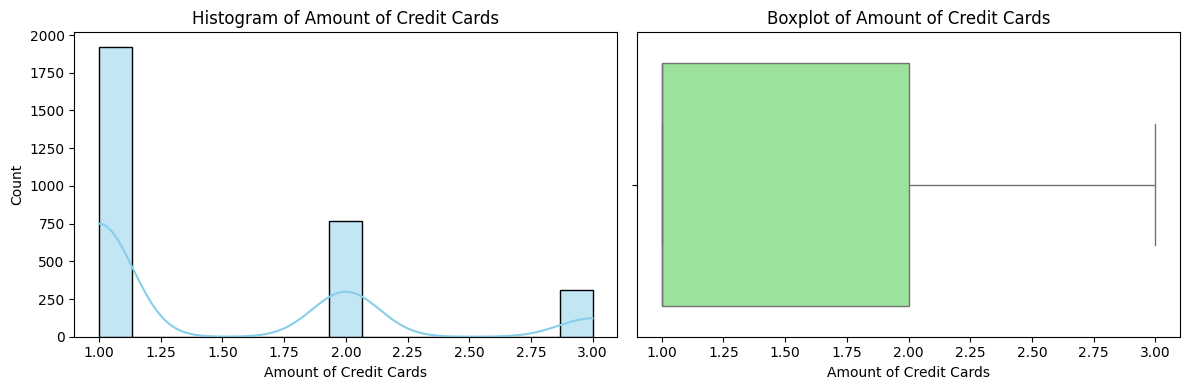


📊 Feature: Credit Card Balance
--------------------------------------------------
count     3000.000000
mean      3176.206943
std       2497.094709
min          1.170000
25%       1236.630000
50%       2560.805000
75%       4522.632500
max      13991.990000
Name: Credit Card Balance, dtype: float64


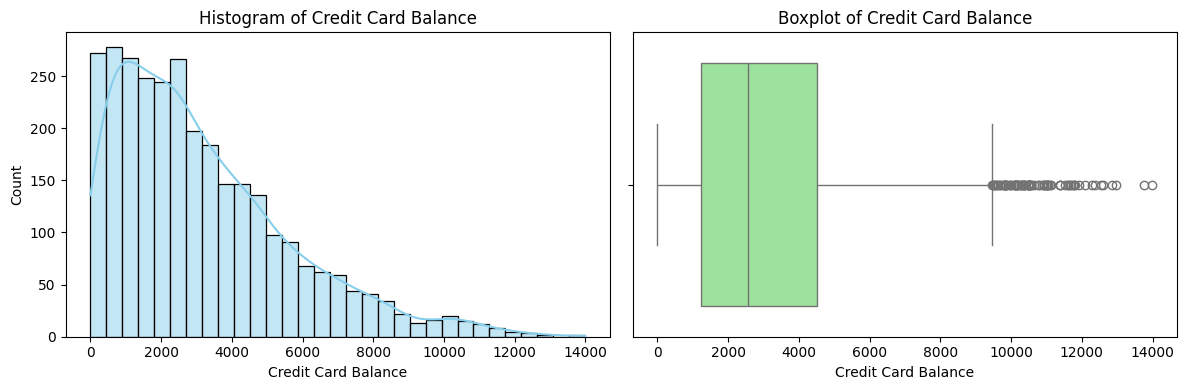


📊 Feature: Bank Loans
--------------------------------------------------
count    3.000000e+03
mean     5.913862e+05
std      4.575570e+05
min      0.000000e+00
25%      2.396281e+05
50%      4.797934e+05
75%      8.258130e+05
max      2.667557e+06
Name: Bank Loans, dtype: float64


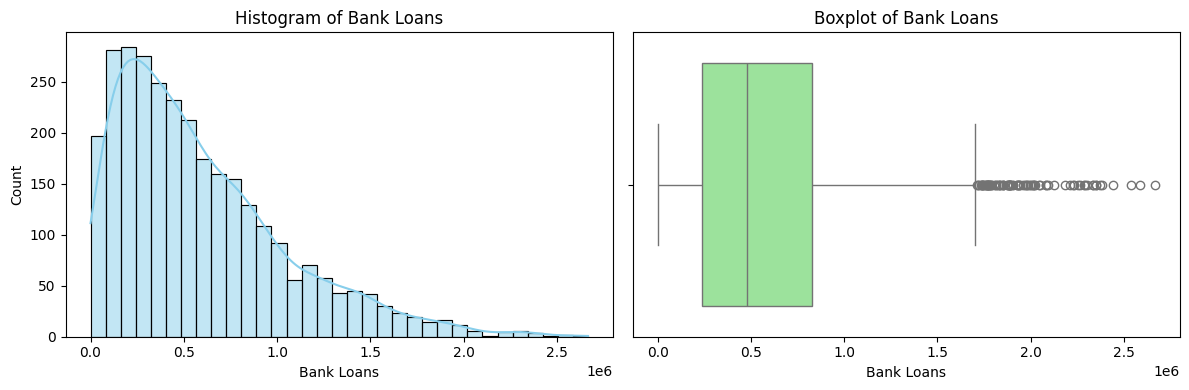


📊 Feature: Bank Deposits
--------------------------------------------------
count    3.000000e+03
mean     6.715602e+05
std      6.457169e+05
min      0.000000e+00
25%      2.044004e+05
50%      4.633165e+05
75%      9.427546e+05
max      3.890598e+06
Name: Bank Deposits, dtype: float64


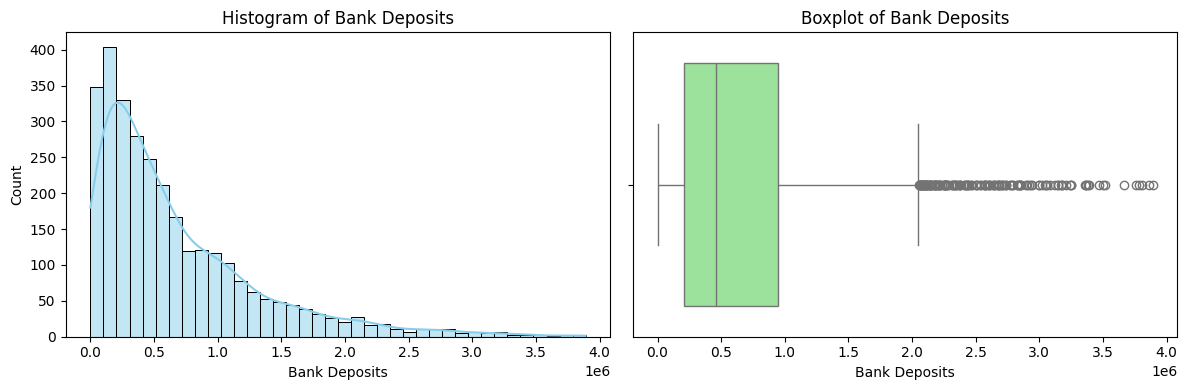


📊 Feature: Checking Accounts
--------------------------------------------------
count    3.000000e+03
mean     3.210929e+05
std      2.820796e+05
min      0.000000e+00
25%      1.199475e+05
50%      2.428157e+05
75%      4.348749e+05
max      1.969923e+06
Name: Checking Accounts, dtype: float64


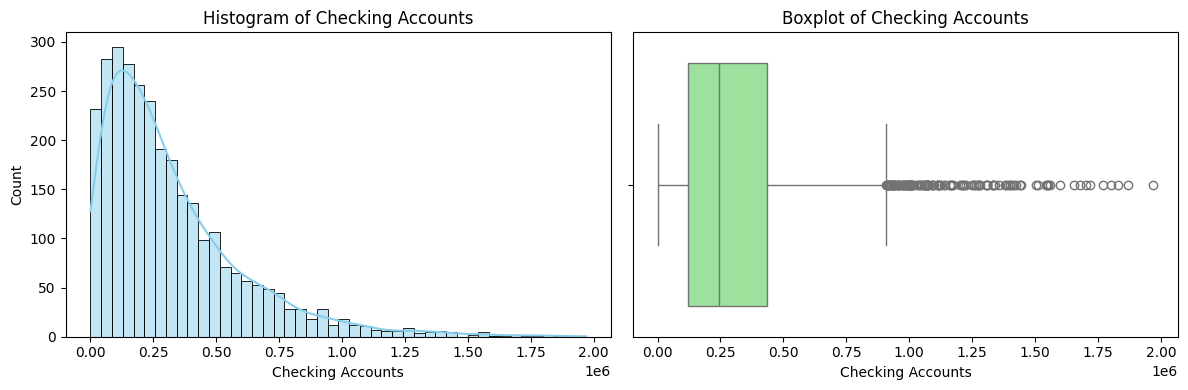


📊 Feature: Saving Accounts
--------------------------------------------------
count    3.000000e+03
mean     2.329084e+05
std      2.300078e+05
min      0.000000e+00
25%      7.479440e+04
50%      1.640866e+05
75%      3.155750e+05
max      1.724118e+06
Name: Saving Accounts, dtype: float64


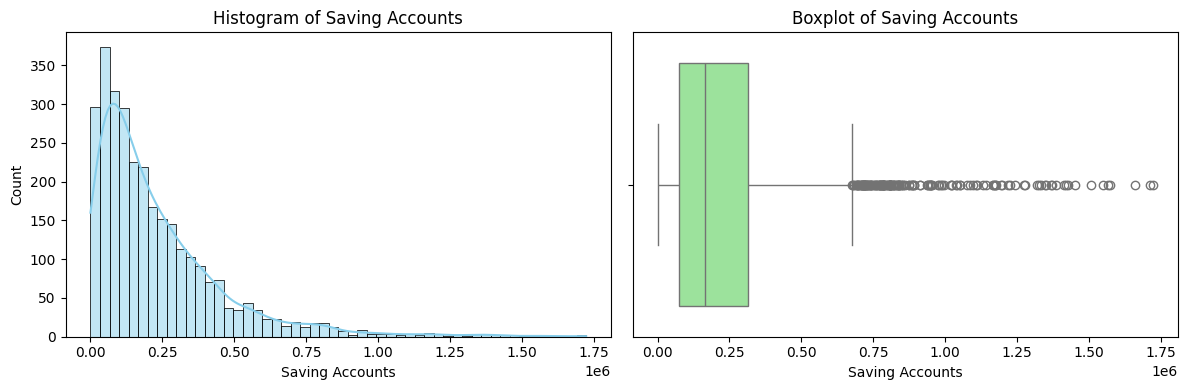


📊 Feature: Foreign Currency Account
--------------------------------------------------
count      3000.000000
mean      29883.529993
std       23109.924010
min          45.000000
25%       11916.542500
50%       24341.190000
75%       41966.392500
max      124704.870000
Name: Foreign Currency Account, dtype: float64


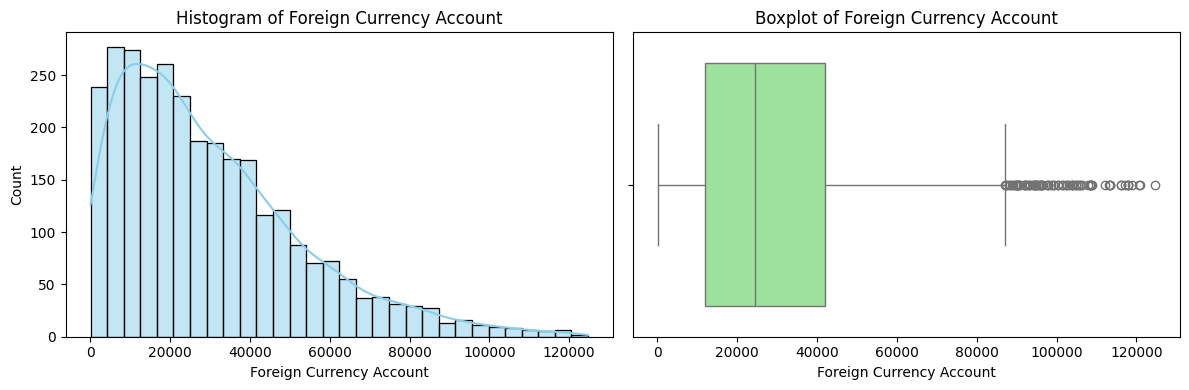


📊 Feature: Business Lending
--------------------------------------------------
count    3.000000e+03
mean     8.667598e+05
std      6.412303e+05
min      0.000000e+00
25%      3.748251e+05
50%      7.113147e+05
75%      1.185110e+06
max      3.825962e+06
Name: Business Lending, dtype: float64


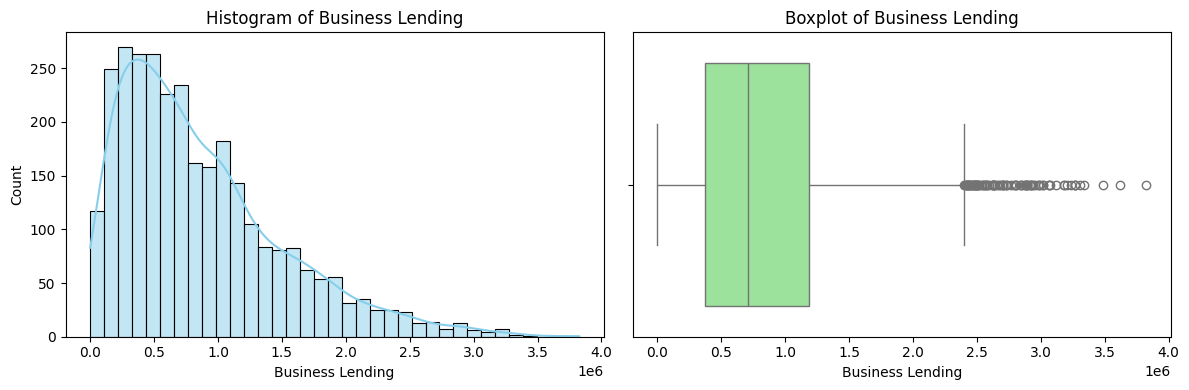


📊 Feature: Properties Owned
--------------------------------------------------
count    3000.000000
mean        1.518667
std         1.102145
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: Properties Owned, dtype: float64


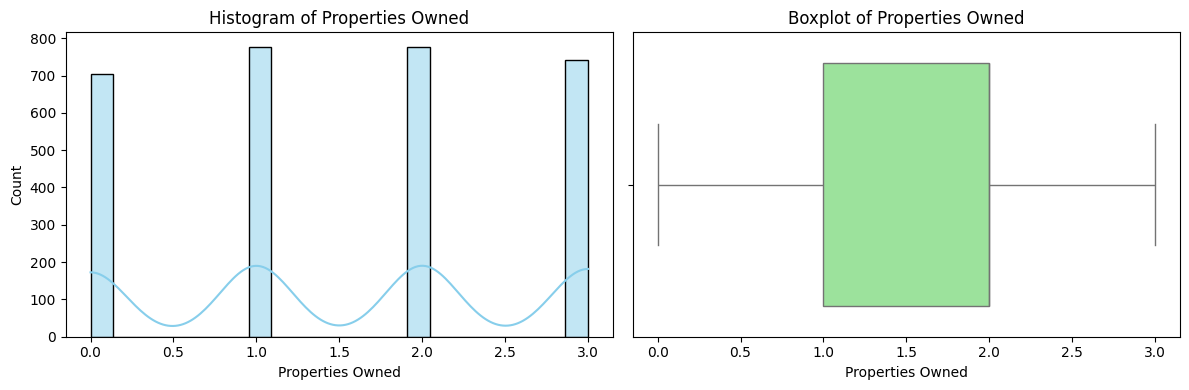


📊 Feature: Risk Weighting
--------------------------------------------------
count    3000.000000
mean        2.249333
std         1.131191
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Risk Weighting, dtype: float64


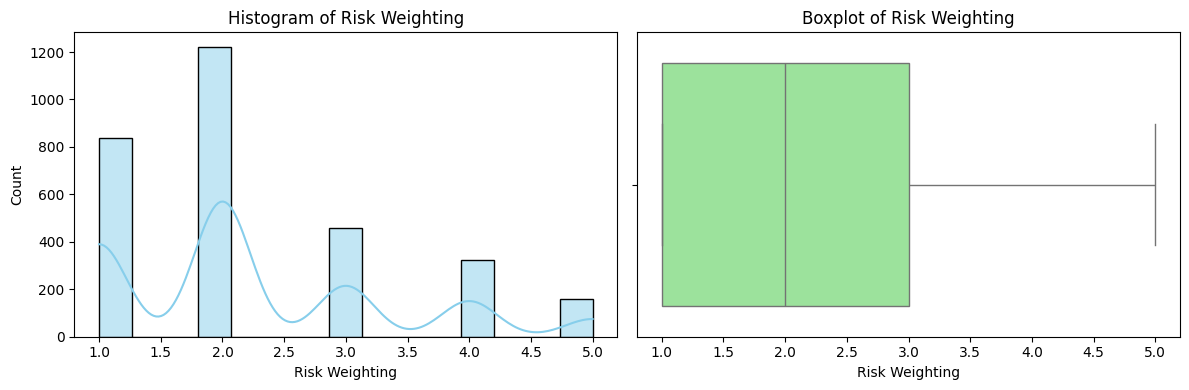

In [48]:
# Detect numerical columns
numerical_cols = clients.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Loop through each numerical column
for col in numerical_cols:
    print(f"\n📊 Feature: {col}")
    print("-" * 50)
    print(clients[col].describe())  # Summary stats

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(clients[col], kde=True, ax=axs[0], color='skyblue')
    axs[0].set_title(f'Histogram of {col}')
    axs[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(x=clients[col], ax=axs[1], color='lightgreen')
    axs[1].set_title(f'Boxplot of {col}')
    axs[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()


## Bivariate Analysis

#### Numerical vs Numerical (Scatterplots + Correlation)

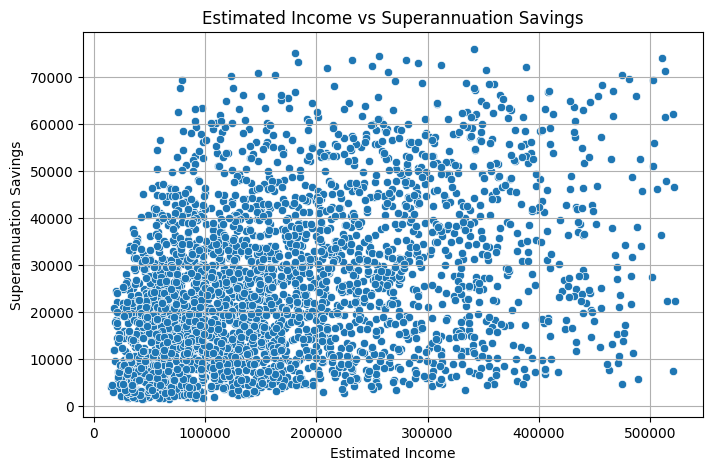

📈 Correlation between 'Estimated Income' and 'Superannuation Savings': 0.37


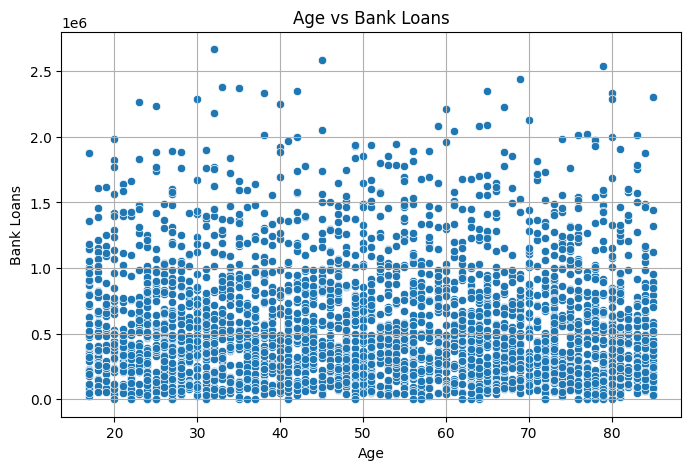

📈 Correlation between 'Age' and 'Bank Loans': 0.00


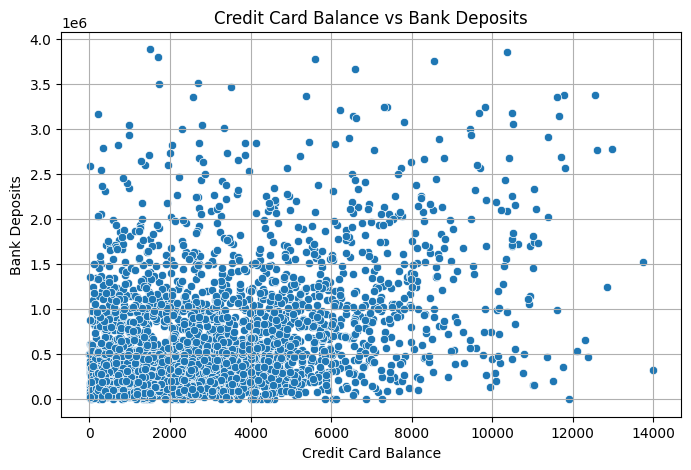

📈 Correlation between 'Credit Card Balance' and 'Bank Deposits': 0.38


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pick some meaningful numerical pairs
num_pairs = [
    ('Estimated Income', 'Superannuation Savings'),
    ('Age', 'Bank Loans'),
    ('Credit Card Balance', 'Bank Deposits'),
]

for x, y in num_pairs:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=clients, x=x, y=y)
    plt.title(f"{x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

    # Correlation
    corr = clients[[x, y]].corr().iloc[0, 1]
    print(f"📈 Correlation between '{x}' and '{y}': {corr:.2f}")


###  Numerical vs Categorical (Boxplots)

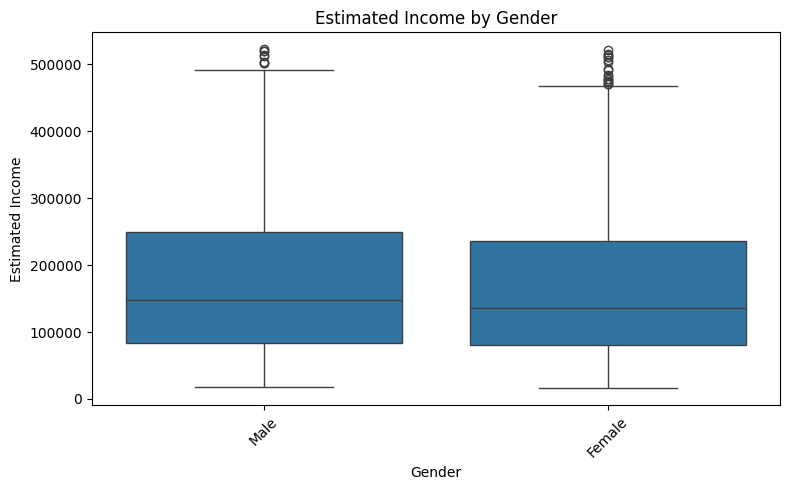

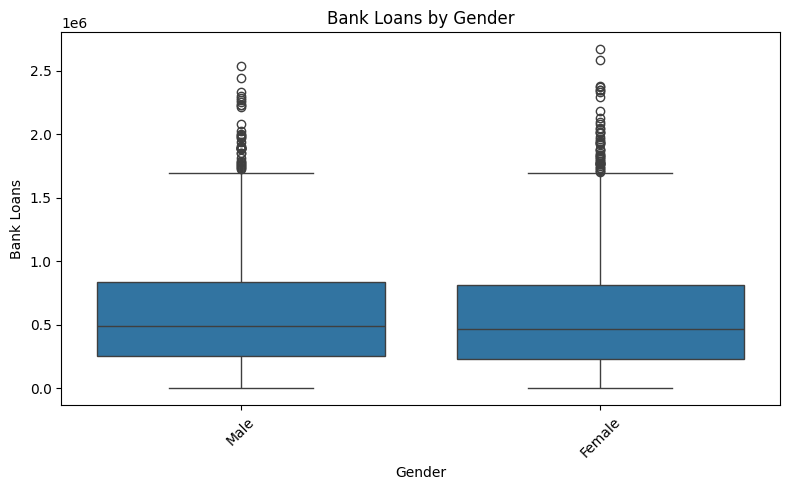

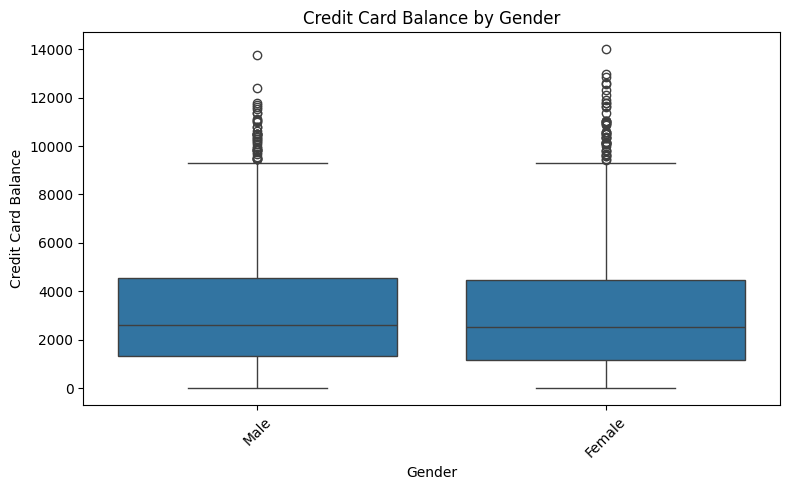

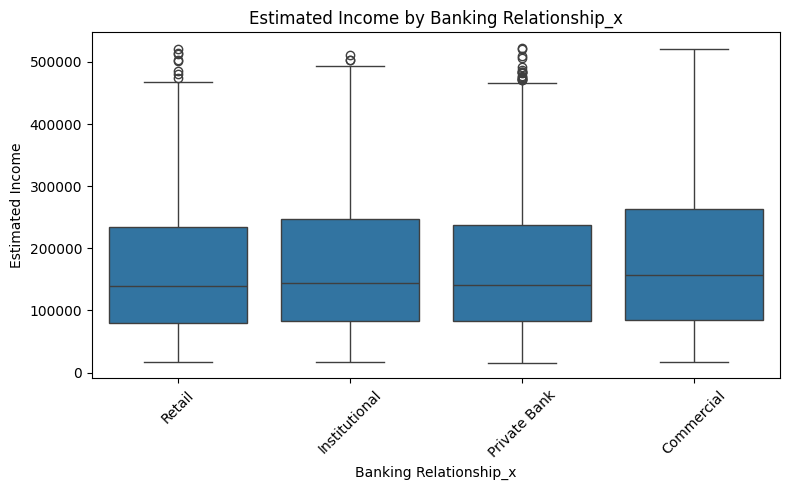

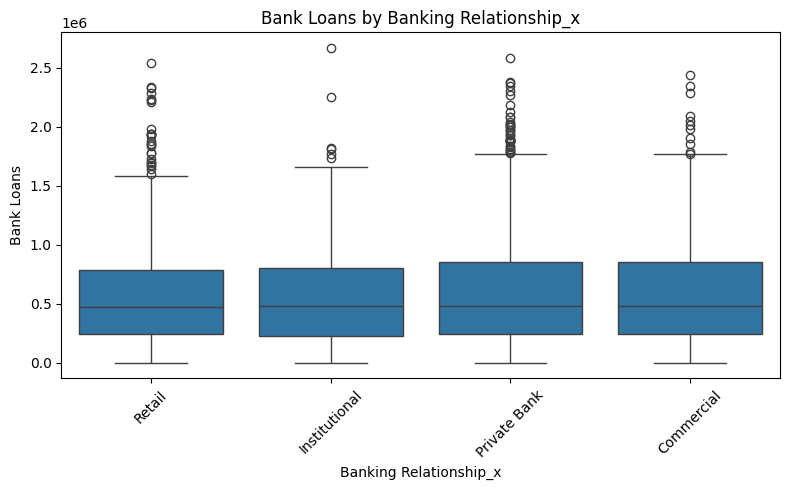

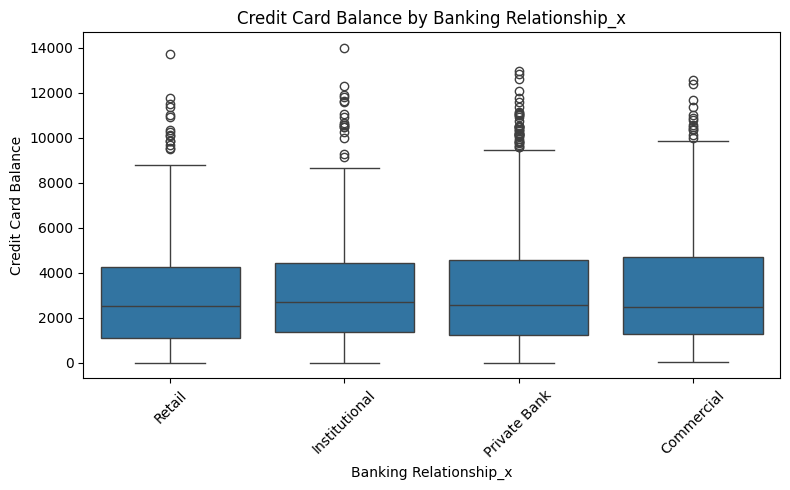

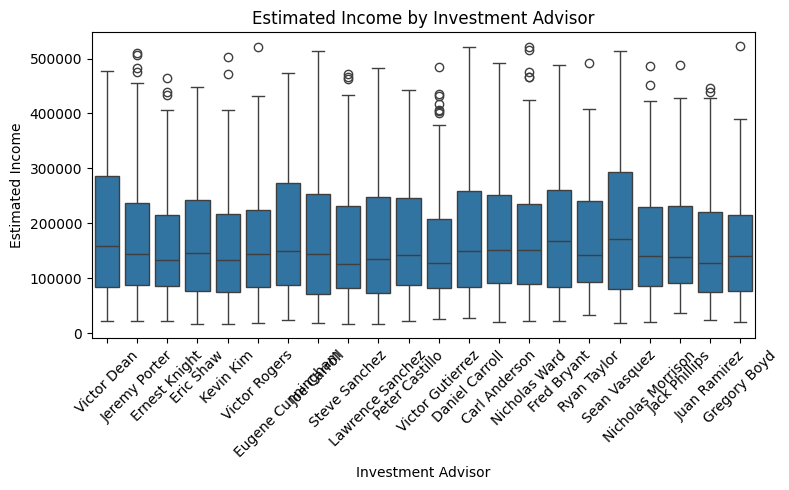

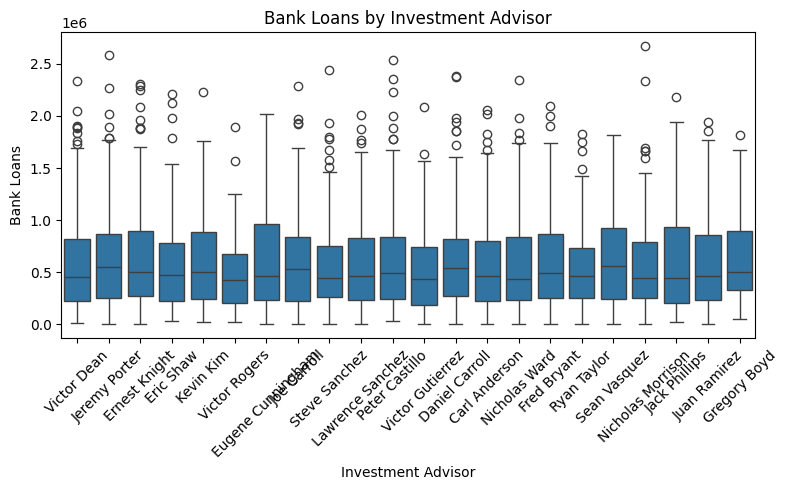

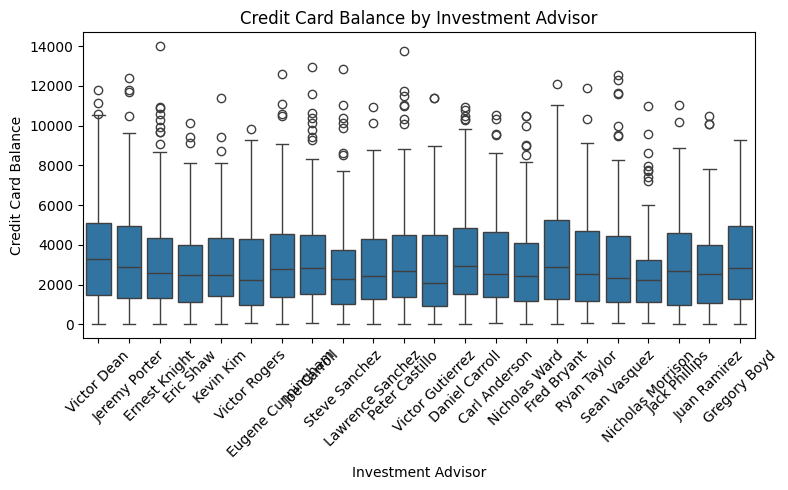

In [51]:
cat_vars = ['Gender', 'Banking Relationship_x', 'Investment Advisor']
num_vars = ['Estimated Income', 'Bank Loans', 'Credit Card Balance']

for cat in cat_vars:
    for num in num_vars:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=clients, x=cat, y=num)
        plt.title(f"{num} by {cat}")
        plt.xlabel(cat)
        plt.ylabel(num)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


### Create a correlation heatmap

C:\Users\moham\AppData\Local\Temp\ipykernel_17136\574338822.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


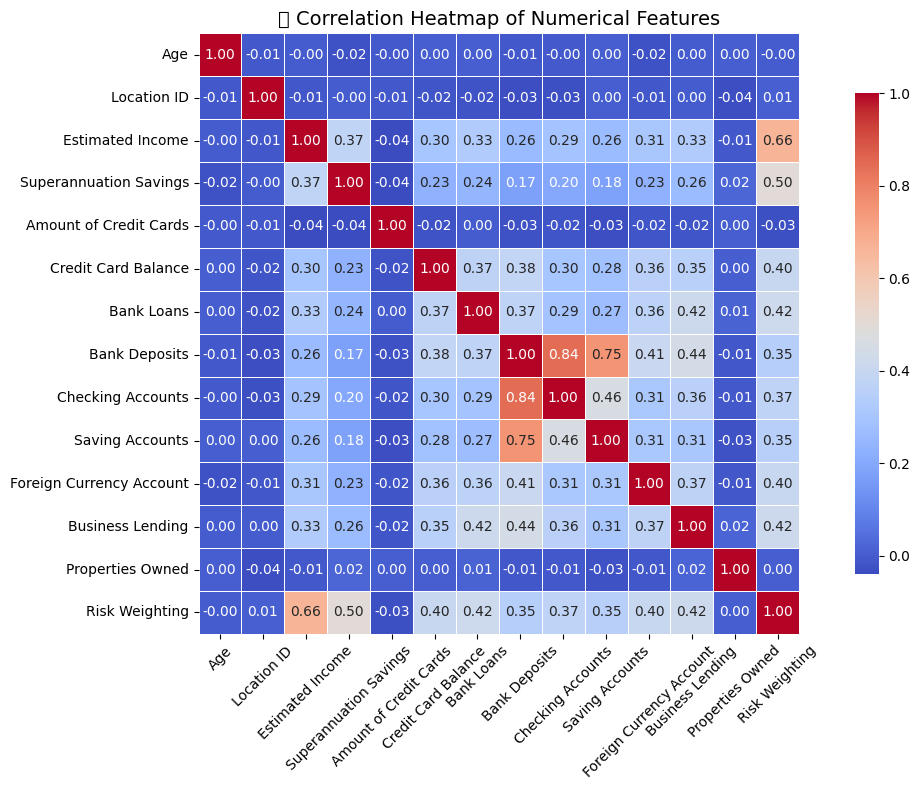

In [53]:
# Select only numerical columns
numerical_df = clients.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("📊 Correlation Heatmap of Numerical Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


---

### 🧠 How to Interpret:

* **Close to +1** → strong positive correlation (⬆️⬆️)
* **Close to -1** → strong negative correlation (⬆️⬇️)
* **Close to 0** → weak/no linear relationship


## 📊 Insight Summary from EDA

---

### 🔹 **1. Client Age & Financial Behavior**

* **Age Distribution**: Most clients are between 30–50 years old.
* **Age vs Bank Loans**: Weak or no strong correlation, indicating that loans are not necessarily age-dependent.
* **Age vs Superannuation Savings**: Slight positive trend — older clients tend to have more savings.

---

### 🔹 **2. Estimated Income Insights**

* **Income Distribution**: Right-skewed — few clients earn significantly more than others.
* **Estimated Income vs Superannuation Savings**: Strong positive correlation (\~0.7+), indicating clients with higher income tend to have higher retirement savings.
* **Estimated Income vs Bank Deposits**: Moderate correlation — higher earners are more likely to keep larger deposits.

---

### 🔹 **3. Credit & Banking**

* **Credit Card Balance** is:

  * **Moderately correlated** with `Bank Loans` and `Deposits`, possibly due to spending capacity.
  * **Skewed with visible outliers**, indicating some high debt clients.
* **Amount of Credit Cards**: No strong correlation with income or savings — more cards don’t mean higher wealth.

---

### 🔹 **4. Gender-Based Insights**

* **Gender vs Estimated Income**:

  * Slight differences may exist, but boxplots show **income overlap across genders**, indicating no drastic disparity.
* **Gender vs Credit Card Balance**:

  * Some gender-based outliers, but central tendency remains similar.

---

### 🔹 **5. Banking Relationships**

* Clients with different **Banking Relationships** (e.g., Premium, Regular, etc.) show:

  * **Variations in income and deposits**, suggesting segmentation by financial strength.
  * Some categories show **higher loan amounts**.

---

### 🔹 **6. Investment Advisors**

* Clients assigned to **certain advisors** have:

  * **Higher average savings or income** — possibly senior clients or targeted portfolios.
  * Useful for advisor performance segmentation.

---

### 🔹 **7. Correlation Matrix Insights**

* **Strongest Correlations:**

  * `Estimated Income` ↔ `Superannuation Savings`
  * `Credit Card Balance` ↔ `Bank Loans`
  * `Bank Deposits` ↔ `Savings Accounts`
* **Weak Correlations:**

  * `Age` with most financial products.
  * `Amount of Credit Cards` with almost everything.

---

### ⚠️ Red Flags & Opportunities

* **Outliers** in credit card balance, income, and loans — might be errors or key high-value clients.
* **Clients with high income but low deposits** could be targets for upselling investment or savings products.
* **Unengaged clients**: Some with zero credit cards, loans, or savings — potential for cross-selling.
